In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
heartData = pd.read_csv("framingham.csv")

In [ ]:
#EDA

In [5]:
heartData.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [6]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
heartData.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4240.000000  4240.000000  4221.000000  4239.000000  3852.000000   
mean    132.354599    82.897759    25.800801    75.878981    81.963655   
std      22.033300    11.910394     4.079840    12.025348    23.954335   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4240.000000  
mean      0.151887  
std       0.358953  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [ ]:
#Data cleaning

In [8]:
heartData.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
heartData.dropna(inplace = True)

In [10]:
heartData.drop_duplicates()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4237                0             0         0    269.0  133.5   83.0  21.47   
4238                0             1         0    185.0  141.0   98.0  25.60   
4239                0             0         0    196.0  133.0   86.0  20.91   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4237       80.0    107.0           0  
4238       67.0     72.0           0  
4239       85.0     80.0           0  

[3658 rows x 16 columns]

In [9]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [11]:
heartData.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000    3658.000000  3658.000000   
mean      0.443685    49.551941     1.980317       0.489065     9.025424   
std       0.496886     8.562029     1.022656       0.499949    11.921590   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3658.000000      3658.000000   3658.000000  3658.000000  3658.000000   
mean      0.030344         0.005741      0.311646     0.027064   236.847731   
std       0.171557         0.075561      0.463229     0.162292    44.097681   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3658.000000  3658.000000  3658.000000  3658.000000  3658.000000   
mean    132.370558    82.917031    25.782802    75.730727    81.852925   
std      22.086866    11.974258     4.065601    11.981525    23.904164   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     143.875000    90.000000    28.037500    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3658.000000  
mean      0.152269  
std       0.359331  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

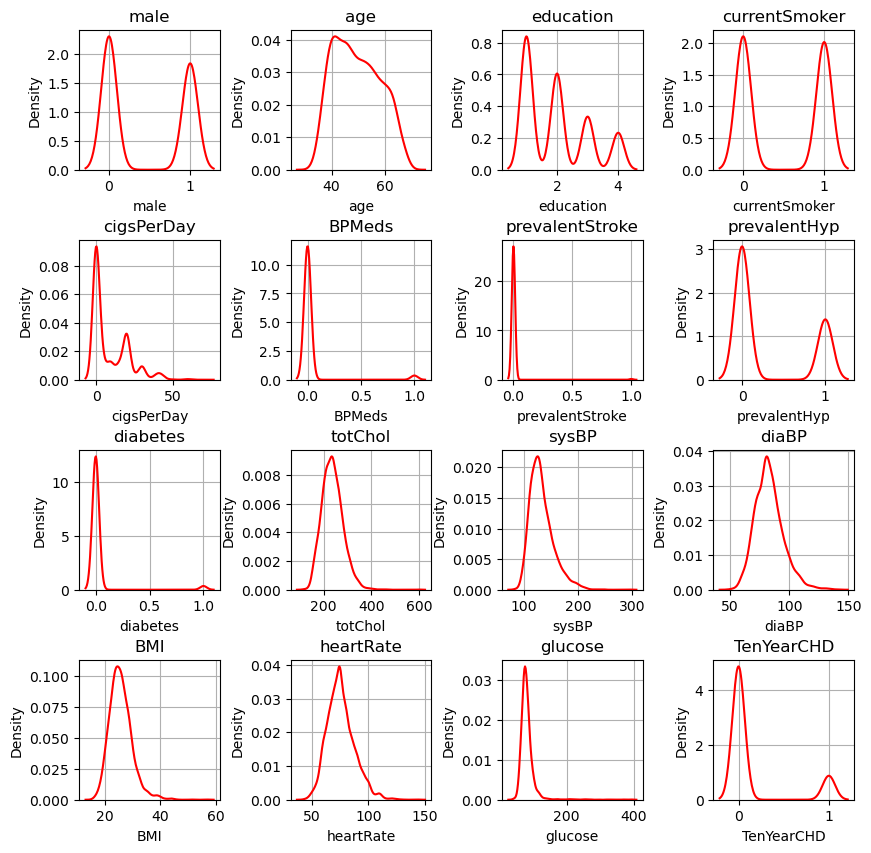

In [80]:
count = 1
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    sns.kdeplot(heartData.iloc[:, i], ax=ax, color='red')
    ax.grid()
    ax.set_title(heartData.columns[i])

plt.subplots_adjust(wspace=0.5, hspace=0.5)  
plt.show()

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'cigsPerDay'),
  Text(3, 0, 'totChol'),
  Text(4, 0, 'sysBP'),
  Text(5, 0, 'diaBP'),
  Text(6, 0, 'BMI'),
  Text(7, 0, 'heartRate'),
  Text(8, 0, 'glucose')])

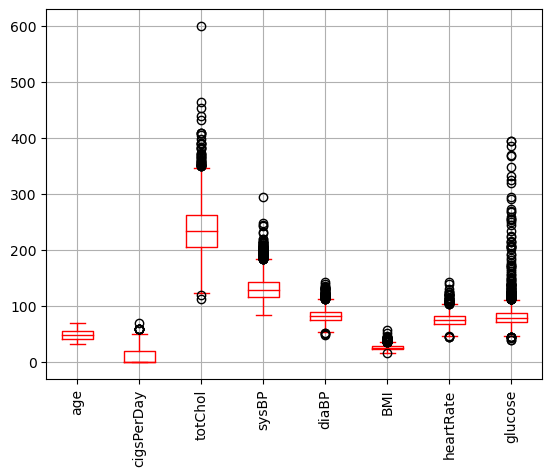

In [81]:
heartData_nonbinaryData = heartData[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
heartData_nonbinaryData.boxplot(color='red')
plt.xticks(rotation=90)

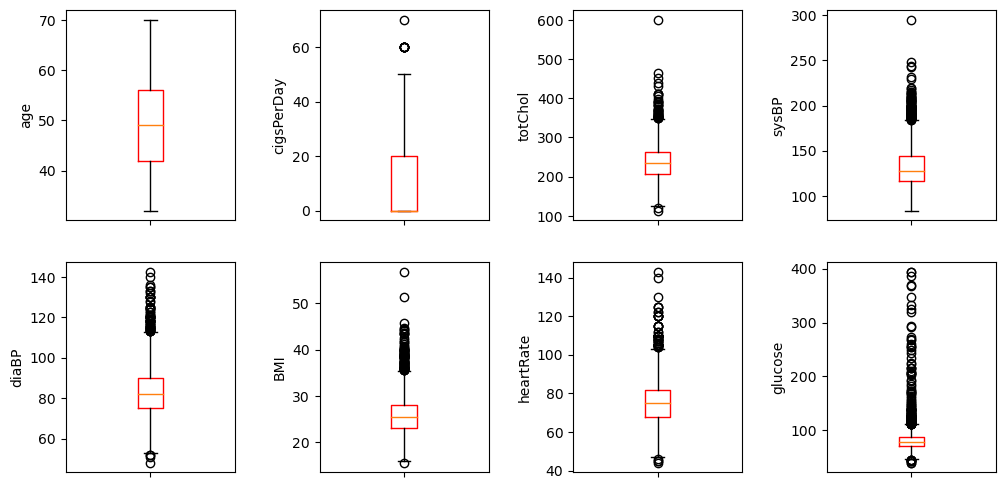

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

ax_flat = ax.flatten()
for i, column in enumerate(heartData_nonbinaryData.columns):
    ax_flat[i].boxplot(heartData_nonbinaryData[column], boxprops=dict(color='red'), meanline=True, meanprops=dict(color='black'))
    ax_flat[i].set_ylabel(column)
    ax_flat[i].set_xticklabels([])

plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
#Random Forest Classifier Model

In [50]:
X = heartData.drop('TenYearCHD', axis=1)
y = heartData['TenYearCHD']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf_model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.837431693989071


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.67      0.05      0.09       122

    accuracy                           0.84       732
   macro avg       0.75      0.52      0.50       732
weighted avg       0.81      0.84      0.77       732



In [36]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

            Feature  Importance
10            sysBP    0.132372
12              BMI    0.129523
1               age    0.124457
9           totChol    0.122926
11            diaBP    0.117616
14          glucose    0.116146
13        heartRate    0.097722
4        cigsPerDay    0.049785
2         education    0.038021
0              male    0.021749
7      prevalentHyp    0.016809
3     currentSmoker    0.012996
5            BPMeds    0.009373
8          diabetes    0.006082
6   prevalentStroke    0.004423


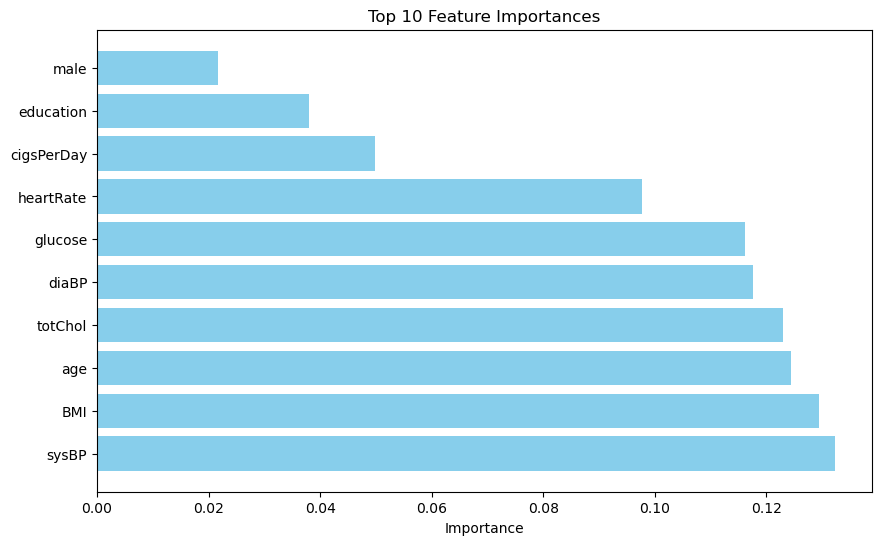

In [40]:
top_n = 10

top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances')
plt.show()

In [41]:
#Random classifier has an f1 score of 0.09 - model is unable to predict positive cases accurately. 

In [42]:
#Data augmentation

In [58]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_oversampled, y_oversampled)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       610
           1       0.50      0.11      0.18       122

    accuracy                           0.83       732
   macro avg       0.67      0.54      0.54       732
weighted avg       0.79      0.83      0.79       732



In [59]:
#model still performs poorly when predicting positive cases.

In [60]:
#Feature engineering

In [105]:
important_features = ['sysBP', 'BMI', 'age', 'totChol', 'diaBP', 'glucose']

In [114]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Oversample the training set
oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(X_train_selected, y_train)

# Train the model with the oversampled data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_oversampled, y_oversampled)

# Make predictions on the test set with the selected features
y_pred = model.predict(X_test_selected)

# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8387978142076503
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.56      0.16      0.25       122

    accuracy                           0.84       732
   macro avg       0.70      0.57      0.58       732
weighted avg       0.80      0.84      0.80       732

